In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy.stats import chi2

# to read mzML files
from pyteomics import mzml

# to visualize MS/MS and obtain ground truth
from pyteomics import pylab_aux as pa
from pyteomics import mass

# to find peaks
from scipy.signal import find_peaks

In [2]:
m_df = pd.read_csv("../data/PSM_df.csv")

In [3]:
plotting_dict = {
    "m/z array" : np.random.randint(0,400,8),
    "intensity array" : np.random.randint(0,400,8),
}

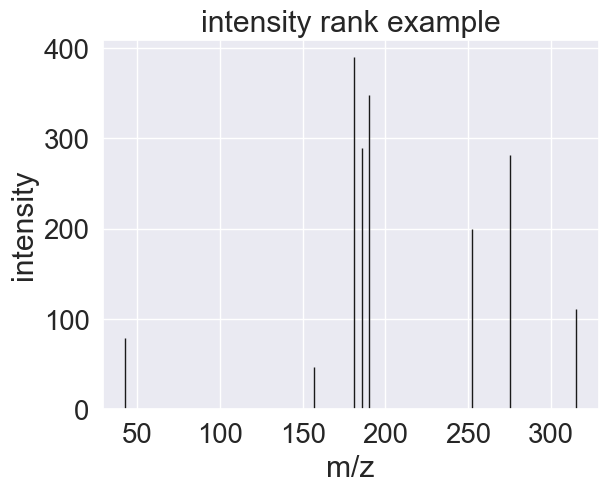

In [4]:
sns.reset_defaults()
sns.set(font_scale=1.8)
pa.plot_spectrum(plotting_dict)
plt.title("intensity rank example")
plt.show()

In [5]:
m_df[m_df["Peptide"] == "AAAAAATAAAAASIR"]#["m/z array"]

,Spectrum,Peptide,Hyperscore
1043,"{'index': 19954, 'id': 'controllerType=0 contr...",AAAAAATAAAAASIR,43.184


In [6]:
m_df.head()

,Spectrum,Peptide,Hyperscore
0,"{'index': 24168, 'id': 'controllerType=0 contr...",VIHDNFGIVEGLMTTVHAITATQK,95.553
1,"{'index': 16758, 'id': 'controllerType=0 contr...",KDLYANTVLSGGTTMYPGIADR,85.386
2,"{'index': 20733, 'id': 'controllerType=0 contr...",SGDAAIVDMVPGKPMCVESFSDYPPLGR,80.330
3,"{'index': 29352, 'id': 'controllerType=0 contr...",DLGEELEALKTELEDTLDSTAAQQELR,80.242
4,"{'index': 26551, 'id': 'controllerType=0 contr...",DGAGFLINLIDSPGHVDFSSEVTAALR,78.583


In [7]:
def I_to_L(sequence):
    for i in range(len(sequence)):
        if sequence[i] == "I":
            new_seq = [char for char in sequence]
            new_seq[i] = "L"
            sequence = "".join(new_seq)
    return sequence

In [8]:
import difflib
def get_overlap(s1, s2):
    s = difflib.SequenceMatcher(None, s1, s2)
    pos_a, pos_b, size = s.find_longest_match(0, len(s1), 0, len(s2))
    return s1[pos_a:pos_a+size]

In [9]:
import difflib

def get_all_overlaps(s1, s2, min_len=3):
    matcher = difflib.SequenceMatcher(None, s1, s2)
    matches = matcher.get_matching_blocks()

    # Extract all non-trivial (length >= min_len) matching substrings
    overlaps = []
    for match in matches:
        a, b, size = match
        if size >= min_len:
            overlap = s1[a:a+size]  # could also use s2[b:b+size]
            overlaps.append(overlap)

    return overlaps


In [10]:
def find_overlap_in_top1():
    print("yurp")
    all_overlaps = {}
    for real_peptide, entry in zip(multi_pep,multi_pep.values()):
        sequence = entry["sequence"][0]
        overlap_list = []
        found_peptide = "".join(eval(sequence))
        #print(found_peptide)
        # print(real_peptide)
        overlap = get_all_overlaps(real_peptide, found_peptide, min_len=3)
        overlap_list.append(overlap)
        joined_overlaps = ["".join(ind_overlaps) for ind_overlaps in overlap_list]
        longest_overlap = max(joined_overlaps,key=len)
        longest_overlap_index = joined_overlaps.index(longest_overlap)
        # print(overlap_list)
        longest_overlap_len = len("".join(overlap_list[longest_overlap_index]))
        #print((eval(top_20[longest_overlap_index])))
        #print(len(real_peptide))
        #print(real_peptide)len("".join(overlap_list[longest_overlap_index]))
        top_1_pep_stats[real_peptide]["overlaps"] = overlap_list
        if longest_overlap_len > 0:
            top_1_pep_stats[real_peptide]["longest_overlap_pep"] = (
                (sequence)
            )
            top_1_pep_stats[real_peptide]["longest_overlap"] = overlap_list[longest_overlap_index]
        elif longest_overlap_len == 0:
            top_1_pep_stats[real_peptide]["longest_overlap_pep"] = []
            top_1_pep_stats[real_peptide]["longest_overlap"] = []
        top_1_pep_stats[real_peptide]["longest_overlap_len"] = longest_overlap_len
        top_1_pep_stats[real_peptide]["real_pep_len"] = len(real_peptide)
        top_1_pep_stats[real_peptide]["real_peptide"] = real_peptide
        top_1_pep_stats[real_peptide]["longest_overlap_perc"] = longest_overlap_len/ len(real_peptide)
        top_1_pep_stats[real_peptide]["combined_p"] = multi_pep[real_peptide]["combined_p"].values[0]

In [36]:
def find_overlaps_in_top_n(n):
    print("yurp")
    all_overlaps = {}
    for real_peptide, entry in zip(multi_pep,multi_pep.values()):
        try:
            top_n = entry["sequence"][0:n].values
        except:
            top_n = entry["sequence"].values
        overlap_list = []
        combined_p_list = []
        for sequence in top_n:
            found_peptide = "".join(eval(sequence))
            #print(found_peptide)
            # print(real_peptide)
            overlap = get_all_overlaps(real_peptide, found_peptide, min_len=3)
            overlap_list.append(overlap)
            combined_p_list.append(entry[entry["sequence"]== sequence]["combined_p"].values[0])
        joined_overlaps = ["".join(ind_overlaps) for ind_overlaps in overlap_list]
        longest_overlap = max(joined_overlaps,key=len)
        longest_overlap_index = joined_overlaps.index(longest_overlap)
        #print(combined_p_list)
        longest_overlap_len = len("".join(overlap_list[longest_overlap_index]))
        #print((eval(top_n[longest_overlap_index])))
        #print(len(real_peptide))
        #print(real_peptide)len("".join(overlap_list[longest_overlap_index]))
        multi_pep_stats[real_peptide]["overlaps"] = overlap_list
        if longest_overlap_len > 0:
            multi_pep_stats[real_peptide]["longest_overlap_pep"] = (
                (eval(top_n[longest_overlap_index]))
            )
            multi_pep_stats[real_peptide]["longest_overlap"] = overlap_list[longest_overlap_index]
        elif longest_overlap_len == 0:
            multi_pep_stats[real_peptide]["longest_overlap_pep"] = []
            multi_pep_stats[real_peptide]["longest_overlap"] = []
        multi_pep_stats[real_peptide]["longest_overlap_len"] = longest_overlap_len
        multi_pep_stats[real_peptide]["real_pep_len"] = len(real_peptide)
        multi_pep_stats[real_peptide]["real_peptide"] = real_peptide
        multi_pep_stats[real_peptide]["longest_overlap_perc"] = longest_overlap_len/ len(real_peptide)
        multi_pep_stats[real_peptide]["avg_combined_p"] = np.mean(combined_p_list)
        multi_pep_stats[real_peptide]["longest_overlap_p"] = combined_p_list[longest_overlap_index]

In [12]:
def create_accuracy_dict(multi_pep_stats):
    accuracy_dict = {
    "100%" : 0,
    "75% - 99%": 0,
    "50% - 74%": 0,
    "25% - 49%": 0,
    "1% - 24%": 0,
    "0%": 0
    }
    for entry in multi_pep_stats.values():
        overlap_perc = entry["longest_overlap_perc"]
        # print(overlap_perc)
        if overlap_perc == 1:
            accuracy_dict["100%"] += 1
        elif overlap_perc > 0.75:
            accuracy_dict["75% - 99%"] += 1
        elif overlap_perc > 0.5:
            accuracy_dict["50% - 74%"] += 1
        elif overlap_perc > 0.25:
            accuracy_dict["25% - 49%"] += 1
        elif overlap_perc > 0.01:
            accuracy_dict["1% - 24%"] += 1
        else:
            accuracy_dict["0%"] += 1

    return accuracy_dict

In [13]:
def collect_accuracy_data(multi_pep_stats):
    accuracy_data = {
    "100%" : [],
    "75% - 99%": [],
    "50% - 74%": [],
    "25% - 49%": [],
    "1% - 24%": [],
    "0%": []
    }
    for entry in multi_pep_stats.values():
        overlap_perc = entry["longest_overlap_perc"]
        # print(overlap_perc)
        if overlap_perc == 1:
            accuracy_data["100%"].append(entry)
        elif overlap_perc > 0.75:
            accuracy_data["75% - 99%"].append(entry)
        elif overlap_perc > 0.5:
            accuracy_data["50% - 74%"].append(entry)
        elif overlap_perc > 0.25:
            accuracy_data["25% - 49%"].append(entry)
        elif overlap_perc > 0.01:
            accuracy_data["1% - 24%"].append(entry)
        else:
            accuracy_data["0%"].append(entry)
    return accuracy_data

In [14]:
def interpret_accuracy_data(accuracy_data):
    interpret_dict = {
        "100%" : {},
        "75% - 99%": {},
        "50% - 74%": {},
        "25% - 49%": {},
        "1% - 24%": {},
        "0%": {}
    }
    for percentage_entry in accuracy_data:
        avg_len_list = []
        avg_entropy_list = []
        for i in accuracy_data[percentage_entry]:
            avg_len_list.append(i["real_pep_len"])
            avg_entropy_list.append(i["entropy"])
        interpret_dict[percentage_entry]["avg_len"] = (
            sum(avg_len_list) / len(avg_len_list)
        )
        interpret_dict[percentage_entry]["avg_entropy"] = (
            sum(avg_entropy_list) / len(avg_entropy_list)
        )
    return interpret_dict

In [15]:
def avg_combined_p_for_n(accuracy_data):
    for percentile,data in zip(accuracy_data, accuracy_data.values()):
        print(percentile, np.round(np.mean([x["longest_overlap_p"] for x in data]),9))

In [16]:
def avg_combined_p(accuracy_data):
    for percentile,data in zip(accuracy_data, accuracy_data.values()):
        print(percentile, np.round(np.mean([x["combined_p"] for x in data]),9))

In [17]:
def fisher_combined_vector(p1_array, p2_array):
    chi_stat = -2 * (np.log(p1_array) + np.log(p2_array))
    return chi2.sf(chi_stat, df=4)

In [18]:
m_df["Peptide"] = [I_to_L(x) for x in m_df["Peptide"]]

In [19]:
import os
#os.listdir("../habrok_output")

In [20]:
multi_pep = {}
for file_name in os.listdir("../habrok_output"):
    multi_pep[I_to_L(file_name.replace("_fits.csv",""))] = pd.read_csv(f"../habrok_output/{file_name}")

In [21]:
# set important datathingies
run_num = len(multi_pep)

In [22]:
# transform into correct fisher value
for key, entry in zip(multi_pep,multi_pep.values()):
    entry["norm_rank_p"]= entry["rank_p"] / np.sum(entry["rank_p"])
    entry["norm_mz_fid_p"]= entry["mz_fid_p"] / np.sum(entry["mz_fid_p"])
    entry["combined_p"] = fisher_combined_vector(entry["norm_rank_p"].values, entry["norm_mz_fid_p"].values)
    multi_pep[key] = entry.sort_values(by=["combined_p"], ascending=True).reset_index()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

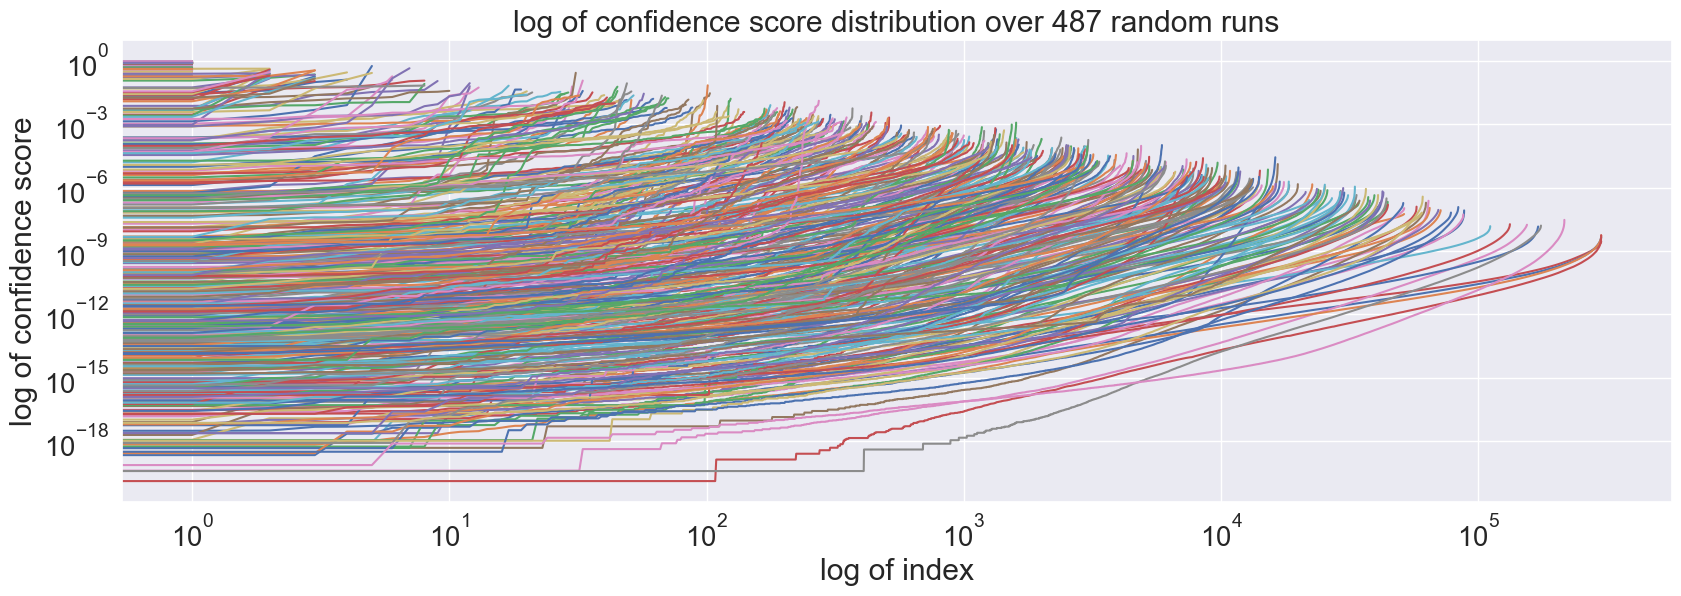

In [23]:
# p-value of 20 peptides

sns.set_theme(rc={'figure.figsize':(20,6)})
sns.set(font_scale=1.8)
plt.title(f"log of confidence score distribution over {run_num} random runs")

i = 0
for entry in multi_pep:
    print(i)
    x = multi_pep[entry].index
    y = multi_pep[entry]["combined_p"]
    i += 1
    plt. xscale('log')
    plt.xlabel("log of index")
    plt. yscale('log')
    plt.ylabel("log of confidence score")
    plt.plot(x,y)

In [24]:
multi_pep_stats = {}
top_1_pep_stats = {}
for real_peptide, entry in zip(multi_pep,multi_pep.values()):
    real_peptide = I_to_L(real_peptide)
    entry["prob_of_outcome"] = entry["combined_p"] / np.sum(
        entry["combined_p"])
    entropy_of_sample = - np.sum(
        entry["prob_of_outcome"] * np.log2(entry["prob_of_outcome"]))
    multi_pep_stats[real_peptide] = {"entropy": entropy_of_sample}
    top_1_pep_stats[real_peptide] = {"entropy": entropy_of_sample}



In [25]:
s1 = 'ADEAVSFR'
s2 = 'ADEGISFR'

overlaps = get_all_overlaps(s1, s2, min_len=3)
for i, o in enumerate(overlaps, 1):
    print(f"{i}. {o}")

overlaps


1. ADE
2. SFR


['ADE', 'SFR']

# TOP n

In [35]:
n_overlaps = 10000
find_overlaps_in_top_n(n_overlaps)

yurp


In [27]:
accuracy_dict = create_accuracy_dict(multi_pep_stats)

In [28]:
accuracy_dict

{'100%': 46,
 '75% - 99%': 40,
 '50% - 74%': 103,
 '25% - 49%': 117,
 '1% - 24%': 79,
 '0%': 102}

In [29]:
accuracy_data = collect_accuracy_data(multi_pep_stats)

In [30]:
interpret_dict = interpret_accuracy_data(accuracy_data)

In [31]:
interpret_dict

{'100%': {'avg_len': 9.695652173913043, 'avg_entropy': 8.71456709277916},
 '75% - 99%': {'avg_len': 11.85, 'avg_entropy': 9.977279331194682},
 '50% - 74%': {'avg_len': 14.058252427184467,
  'avg_entropy': 9.612713915943736},
 '25% - 49%': {'avg_len': 15.504273504273504,
  'avg_entropy': 8.842818222555435},
 '1% - 24%': {'avg_len': 18.367088607594937, 'avg_entropy': 7.313196930081005},
 '0%': {'avg_len': 18.607843137254903, 'avg_entropy': 1.5624939430165155}}

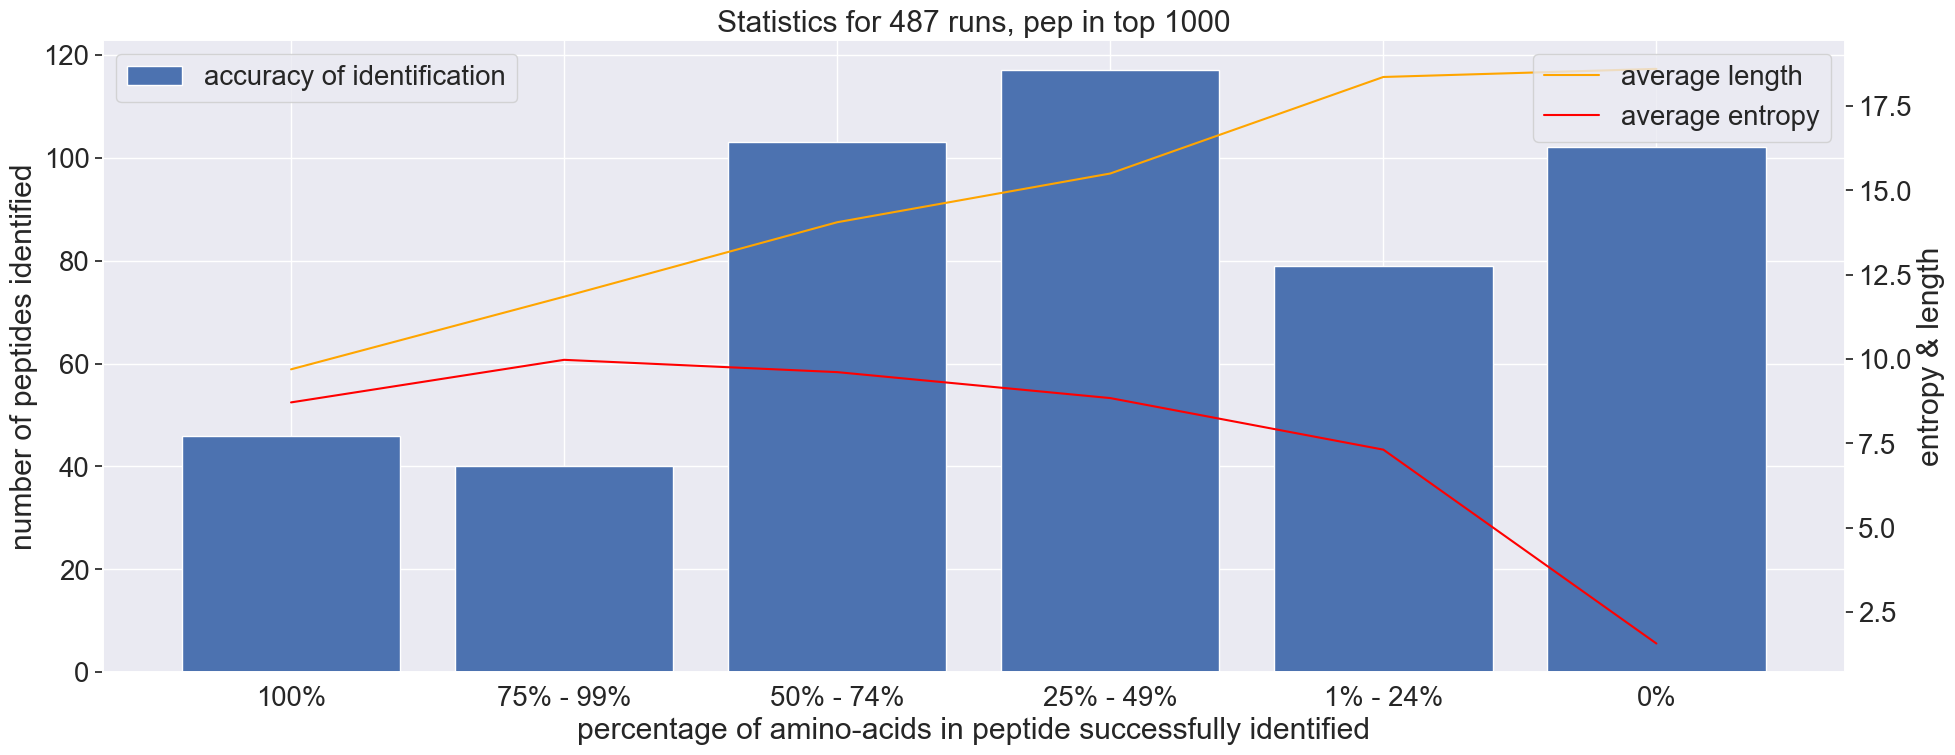

In [32]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.8)

fig, ax1 = plt.subplots()

ax1.bar(
    accuracy_dict.keys(),
    accuracy_dict.values(),
    0.8, label="accuracy of identification"
)

ax2 = ax1.twinx()
ax2.plot(
    interpret_dict.keys(),
    [interpret_dict[x]["avg_len"] for x in interpret_dict.keys()],
    color="orange", label="average length"
)
ax2.plot(
    interpret_dict.keys(),
    [interpret_dict[x]["avg_entropy"] for x in interpret_dict.keys()],
    color="red", label="average entropy"
)
plt.title(f"Statistics for 487 runs, pep in top {n_overlaps}")
ax1.set_xlabel("percentage of amino-acids in peptide successfully identified")
ax1.legend(loc="upper left")
ax1.set_ylabel("number of peptides identified")
ax2.grid(False)
ax2.legend(loc="upper right")
ax2.set_ylabel("entropy & length")
fig.tight_layout()
plt.show()
plt.show()

In [33]:
print("100%:",accuracy_dict["100%"]/sum(accuracy_dict.values())*100)
print("75% - 99%:", accuracy_dict["75% - 99%"]/sum(accuracy_dict.values())*100)
print("50% - 74%:", accuracy_dict["50% - 74%"]/sum(accuracy_dict.values())*100)
print("25% - 49%:", accuracy_dict["25% - 49%"]/sum(accuracy_dict.values())*100)
print("1% - 24%:", accuracy_dict["1% - 24%"]/sum(accuracy_dict.values())*100)
print("0%:", accuracy_dict["0%"]/sum(accuracy_dict.values())*100)

100%: 9.44558521560575
75% - 99%: 8.213552361396303
50% - 74%: 21.149897330595483
25% - 49%: 24.02464065708419
1% - 24%: 16.2217659137577
0%: 20.944558521560573


In [34]:
if n_overlaps == 50:
    accuracy_50 = accuracy_dict
    print(50)
if n_overlaps == 10:
    accuracy_10 = accuracy_dict
    print(10)
if n_overlaps == 100:
    accuracy_100 = accuracy_dict
    print(100)

In [246]:
[interpret_dict[x]["avg_entropy"] for x in interpret_dict.keys()]

[8.656738838945738,
 9.95695395856724,
 9.329444045877942,
 8.887979280650988,
 7.098200119117234,
 2.971446685979466]

In [247]:
avg_combined_p_for_n(accuracy_data)

100% 3e-09
75% - 99% 5e-09
50% - 74% 8.677e-06
25% - 49% 0.000683614
1% - 24% 0.002613474
0% 0.060501325


In [248]:
# 100% accuracy p_dist

plt.plot(
    accuracy_dict["100%"].keys(),
)

AttributeError: 'int' object has no attribute 'keys'

In [49]:
list_100 = [d["real_peptide"] for d in accuracy_data["100%"]]

['ADEGLSFR',
 'AFFSEVER',
 'ALADYLR',
 'ALLELLATR',
 'ASLNMLR',
 'AVASAAAALVLK',
 'AVLFCLSEDK',
 'DMFQETMEAMR',
 'DMPWLALPYK',
 'DYEVDATLK',
 'FDVSSTSVFK',
 'GSDFDCELR',
 'LLEETLALK',
 'LLLLAEGR',
 'LMFEVQDLK',
 'LMSLVDPNR',
 'LDYLLGLK',
 'LFTAESLLGLK',
 'LGDLYEEEMR',
 'LLLWSQR',
 'LLPSLLGR',
 'SELDLLNLR',
 'SLYSMLK',
 'VATPVDWK',
 'VDLVDENFTELR',
 'VEAQLQELQVK',
 'VETFSGVYK',
 'VLASLLLR',
 'YVLLSLR']

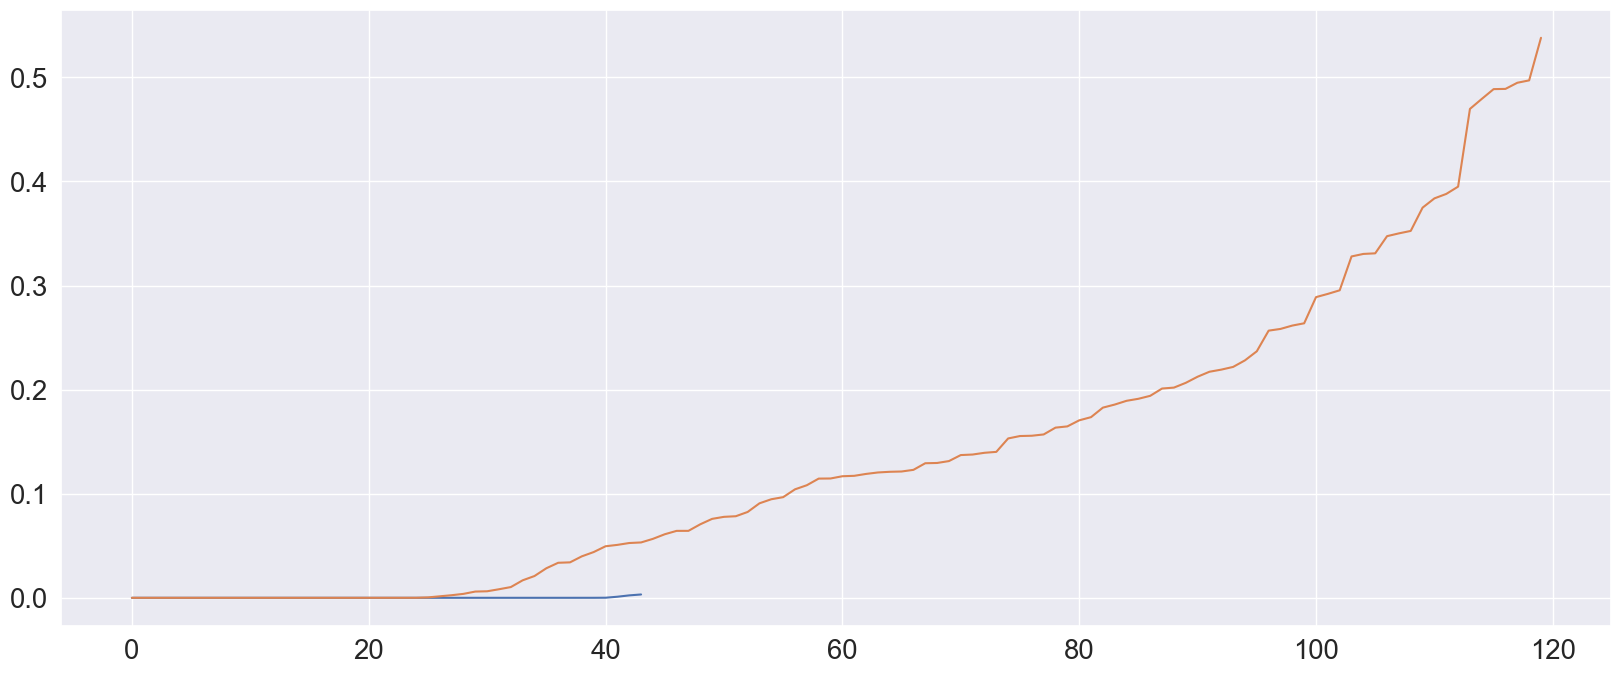

In [270]:
# confidence score distribution for 100% ident vs 0% ident in 100 runs
plt.plot(
    list(range(len(accuracy_data["100%"]))),
    np.sort([entry["avg_combined_p"] for entry in accuracy_data["100%"]]),
    label = "100%"
)
plt.plot(
    list(range(len(accuracy_data["0%"]))),
    np.sort([entry["avg_combined_p"] for entry in accuracy_data["0%"]]),
    label = "0%"
)
plt.
plt.show()

# Look only at the Top peptide

In [188]:
find_overlap_in_top1()

yurp


In [189]:
accuracy_dict_top_1 = create_accuracy_dict(top_1_pep_stats)

In [190]:
accuracy_data_top_1 = collect_accuracy_data(top_1_pep_stats)

In [191]:
interpret_dict_top_1 = interpret_accuracy_data(accuracy_data_top_1)

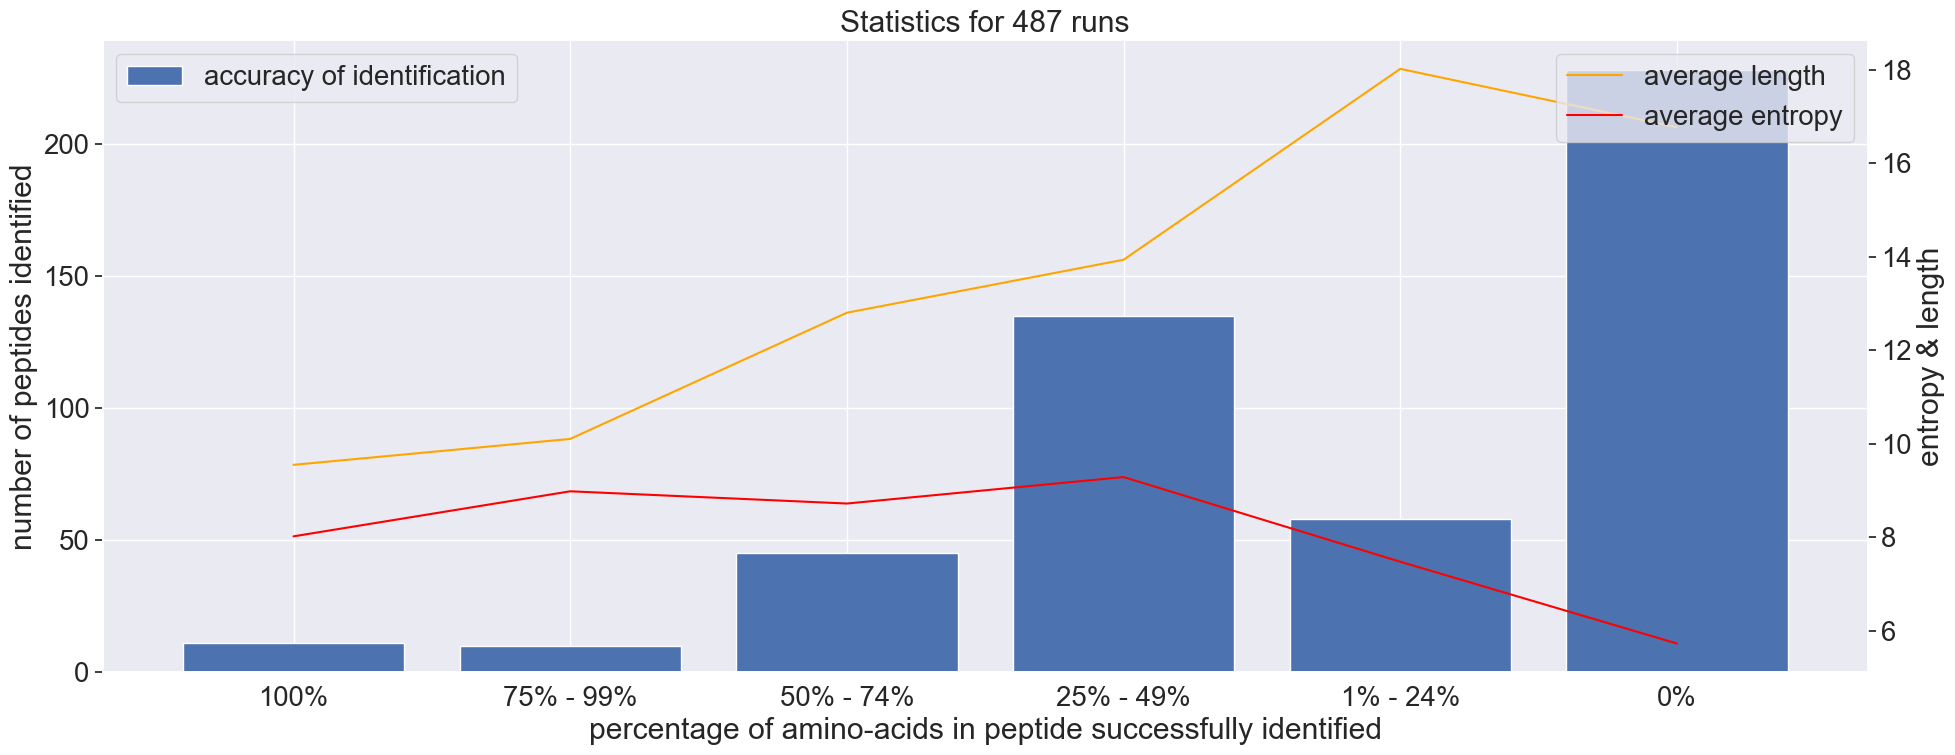

In [192]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.8)

fig, ax1 = plt.subplots()

ax1.bar(
    accuracy_dict_top_1.keys(),
    accuracy_dict_top_1.values(),
    0.8, label="accuracy of identification"
)

ax2 = ax1.twinx()

ax2.plot(
    interpret_dict_top_1.keys(),
    [interpret_dict_top_1[x]["avg_len"] for x in interpret_dict_top_1.keys()],
    color="orange", label="average length"
)
ax2.plot(
    interpret_dict_top_1.keys(),
    [interpret_dict_top_1[x]["avg_entropy"] for x in interpret_dict_top_1.keys()],
    color="red", label="average entropy"
)
plt.title(f"Statistics for {len(multi_pep)} runs")
ax1.set_xlabel("percentage of amino-acids in peptide successfully identified")
ax1.legend(loc="upper left")
ax1.set_ylabel("number of peptides identified")
ax2.grid(False)
ax2.legend(loc="upper right")
ax2.set_ylabel("entropy & length")
fig.tight_layout()
plt.show()

In [193]:
# percentage of hits for how well the hits go
print("100%:",accuracy_dict_top_1["100%"]/sum(accuracy_dict_top_1.values())*100)
print("75% - 99%:", accuracy_dict_top_1["75% - 99%"]/sum(accuracy_dict_top_1.values())*100)
print("50% - 74%:", accuracy_dict_top_1["50% - 74%"]/sum(accuracy_dict_top_1.values())*100)
print("25% - 49%:", accuracy_dict_top_1["25% - 49%"]/sum(accuracy_dict_top_1.values())*100)
print("1% - 24%:", accuracy_dict_top_1["1% - 24%"]/sum(accuracy_dict_top_1.values())*100)
print("0%:", accuracy_dict_top_1["0%"]/sum(accuracy_dict_top_1.values())*100)

100%: 2.2587268993839835
75% - 99%: 2.0533880903490758
50% - 74%: 9.240246406570842
25% - 49%: 27.720739219712527
1% - 24%: 11.90965092402464
0%: 46.81724845995893


In [1]:
accuracy_dict_top_1

NameError: name 'accuracy_dict_top_1' is not defined

In [194]:
[interpret_dict_top_1[x]["avg_len"] for x in interpret_dict_top_1.keys()]

[9.545454545454545,
 10.1,
 12.8,
 13.933333333333334,
 18.017241379310345,
 16.767543859649123]

In [195]:
[interpret_dict_top_1[x]["avg_entropy"] for x in interpret_dict_top_1.keys()]

[8.01576264239165,
 8.979575798794045,
 8.71780415986215,
 9.284007800194706,
 7.472285682280348,
 5.72277854260663]

In [196]:
avg_combined_p(accuracy_data_top_1)

100% 1.1e-08
75% - 99% 0.0
50% - 74% 1.4e-08
25% - 49% 0.000547305
1% - 24% 0.001175443
0% 0.031947917


In [197]:
accuracy_data_top_1

{'100%': [{'entropy': 7.035912013404267,
   'overlaps': [['AVASAAAALVLK']],
   'longest_overlap_pep': "['AV', 'A', 'S', 'A', 'A', 'A', 'AL', 'VL', 'K']",
   'longest_overlap': ['AVASAAAALVLK'],
   'longest_overlap_len': 12,
   'real_pep_len': 12,
   'real_peptide': 'AVASAAAALVLK',
   'longest_overlap_perc': 1.0,
   'combined_p': 7.786605231358122e-15},
  {'entropy': 11.381693814016012,
   'overlaps': [['DMPWLALPYK']],
   'longest_overlap_pep': "['DM', 'P', 'W', 'L', 'AL', 'PY', 'K']",
   'longest_overlap': ['DMPWLALPYK'],
   'longest_overlap_len': 10,
   'real_pep_len': 10,
   'real_peptide': 'DMPWLALPYK',
   'longest_overlap_perc': 1.0,
   'combined_p': 9.913425298182528e-15},
  {'entropy': 3.775417845152601,
   'overlaps': [['DYEVDATLK']],
   'longest_overlap_pep': "['DY', 'E', 'V', 'D', 'AT', 'L', 'K']",
   'longest_overlap': ['DYEVDATLK'],
   'longest_overlap_len': 9,
   'real_pep_len': 9,
   'real_peptide': 'DYEVDATLK',
   'longest_overlap_perc': 1.0,
   'combined_p': 1.8094885713

In [198]:
emptyness_ratio = 0
avg_len = 0
fullness_ratio = 0

for peptide in [name["real_peptide"] for name in accuracy_data_top_1["0%"]]:
    if len(multi_pep[peptide]) == 0:
        emptyness_ratio += 1
    if len(multi_pep[peptide]) != 0:
        avg_len += len(multi_pep[peptide])
        fullness_ratio += 1



In [199]:
print("emptyness 0%:", emptyness_ratio/len([name["real_peptide"] for name in accuracy_data_top_1["0%"]])*100)
print("emptyness all %:",emptyness_ratio/sum(accuracy_dict_top_1.values())*100)

emptyness 0%: 0.0
emptyness all %: 0.0


In [200]:
emptyness_ratio/sum(accuracy_dict_top_1.values())*100

0.0

In [201]:
fullness_ratio

228

In [202]:
avg_len/fullness_ratio

9592.381578947368

In [203]:
100-69.64

30.36

In [204]:
emptyness_ratio = 0
avg_len = 0
fullness_ratio = 0

for peptide in [name["real_peptide"] for name in accuracy_data_top_1["100%"]]:
    if len(multi_pep[peptide]) == 0:
        emptyness_ratio += 1
    if len(multi_pep[peptide]) != 0:
        avg_len += len(multi_pep[peptide])
        fullness_ratio += 1

In [205]:
emptyness_ratio

0

In [206]:
example_plotting_dict = {
    "m/z array" : eval(m_df[m_df["Peptide"] == "AFMTADLPNELLELLEK"]["Spectrum"].values[1])["m/z array"],
    "intensity array" : eval(m_df[m_df["Peptide"] == "AFMTADLPNELLELLEK"]["Spectrum"].values[1])["intensity array"]

}

NameError: name 'array' is not defined

In [207]:
np.where(top_1_pep_stats["combined"])

KeyError: 'combined'

In [208]:
for i in top_1_pep_stats.values():
    if i["longest_overlap_perc"] == 0:
        print(i)

{'entropy': 9.773767931095723, 'overlaps': [[]], 'longest_overlap_pep': [], 'longest_overlap': [], 'longest_overlap_len': 0, 'real_pep_len': 13, 'real_peptide': 'AALLPTSLFLTNK', 'longest_overlap_perc': 0.0, 'combined_p': 3.8275333460005364e-14}
{'entropy': 0.8832678948202065, 'overlaps': [[]], 'longest_overlap_pep': [], 'longest_overlap': [], 'longest_overlap_len': 0, 'real_pep_len': 26, 'real_peptide': 'AELSELPSLVQDLANGNLTWADVEAR', 'longest_overlap_perc': 0.0, 'combined_p': 0.33093764306177886}
{'entropy': 0.632575978841435, 'overlaps': [[]], 'longest_overlap_pep': [], 'longest_overlap': [], 'longest_overlap_len': 0, 'real_pep_len': 22, 'real_peptide': 'AELATEEFLPVTPLLEGFVLLR', 'longest_overlap_perc': 0.0, 'combined_p': 0.1554169382383518}
{'entropy': 12.15041045326967, 'overlaps': [[]], 'longest_overlap_pep': [], 'longest_overlap': [], 'longest_overlap_len': 0, 'real_pep_len': 17, 'real_peptide': 'AFMTADLPNELLELLEK', 'longest_overlap_perc': 0.0, 'combined_p': 2.3175105197710984e-16}


In [92]:
multi_pep["LLEETLALK"]

,level_0,Unnamed: 0,index,sequence,peaks,len_pep,rank_sum,rank_p,SSE,mz_fid_p,combined_p,norm_rank_p,norm_mz_fid_p,prob_of_outcome
0,0,0,464,"['L', 'L', 'E', 'E', 'TL', 'AL', 'K']","[1029.622364, 916.528687, 803.450745, 674.4090...",8,65,0.000871,0.000054,0.000001,1.329465e-12,0.000005,8.800145e-09,7.787582e-11
1,1,1,462,"['L', 'L', 'E', 'E', 'TL', 'RR']","[1029.622364, 916.528687, 803.450745, 674.4090...",7,52,0.001051,0.000054,0.000001,1.594736e-12,0.000006,8.800145e-09,9.341455e-11
2,2,2,408,"['L', 'L', 'EE', 'TL', 'AL', 'K']","[1029.622364, 916.528687, 803.450745, 545.3673...",7,56,0.002061,0.000053,0.000001,3.060651e-12,0.000011,8.800145e-09,1.792832e-10
3,3,3,469,"['L', 'L', 'E', 'E', 'TL', 'A', 'L', 'K']","[1029.622364, 916.528687, 803.450745, 674.4090...",9,84,0.002151,0.000054,0.000001,3.189892e-12,0.000012,8.800145e-09,1.868537e-10
4,4,4,468,"['L', 'L', 'E', 'E', 'TL', 'A', 'LK']","[1029.622364, 916.528687, 803.450745, 674.4090...",8,71,0.002621,0.000054,0.000001,3.862036e-12,0.000014,8.800145e-09,2.262257e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,878,"['A', 'RY', 'A', 'L', 'PD']","[np.float64(916.528687), 845.455566, 526.24902...",6,112,0.682851,0.004857,0.647341,2.494882e-04,0.003724,5.696695e-03,1.461422e-02
996,996,996,866,"['A', 'RY', 'PE', 'G', 'L']","[np.float64(916.528687), 845.455566, 526.24902...",6,114,0.715071,0.004900,0.655511,2.632382e-04,0.003900,5.768592e-03,1.541965e-02
997,997,997,140,"['AL', 'RY', 'A', 'PD', 'L']","[1029.622364, 845.455566, 526.249023, 455.2135...",6,106,0.578811,0.005950,0.823401,2.672702e-04,0.003156,7.246048e-03,1.565584e-02
998,998,998,142,"['AL', 'RY', 'A', 'L', 'PD']","[1029.622364, 845.455566, 526.249023, 455.2135...",6,108,0.614331,0.005960,0.824601,2.826020e-04,0.003350,7.256608e-03,1.655392e-02


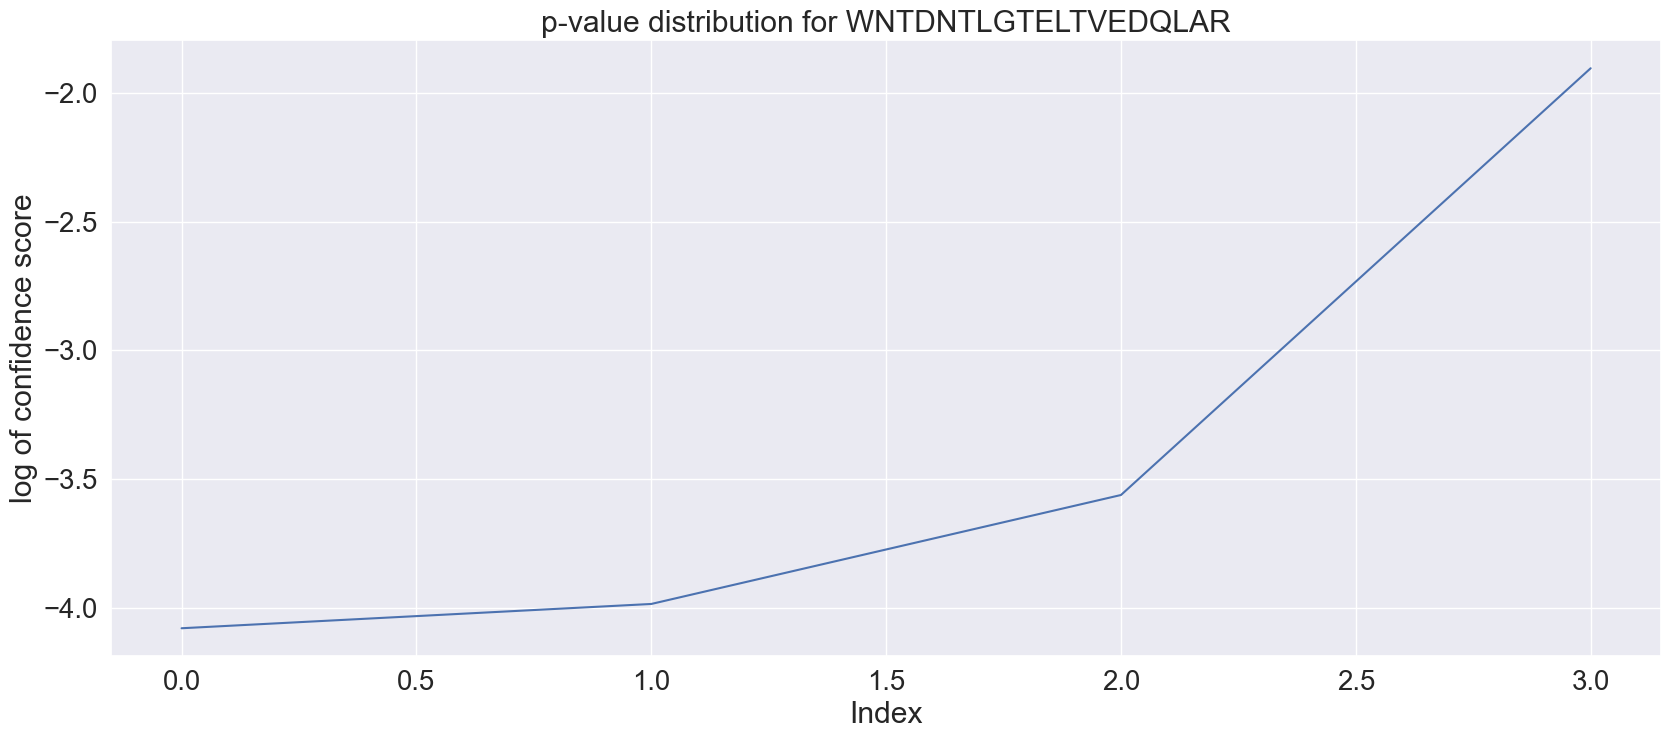

In [209]:
peptide = "WNTDNTLGTELTVEDQLAR"

plt.plot(
    multi_pep[peptide].index,
    np.log(multi_pep[peptide]["combined_p"]),
)
plt.xlabel("Index")
plt.ylabel("log of confidence score")
plt.title(f"p-value distribution for {peptide}")
plt.show()

In [94]:
dist = "75% - 99%"
sns.set_theme(rc={'figure.figsize':(20,6)})
plt.title(f"log of p_value distribution over {dist} in top1")

for entry in accuracy_data_top_1[dist]:
    peptide = entry["real_peptide"]
    x = multi_pep[peptide].index
    y = np.log(multi_pep[peptide]["combined_p"])
    plt.plot(x,y)
plt.savefig(f"../graphs/p_dist_75_top1.png")

# change over different top

In [179]:
accuracy_list = [
    np.array(list(accuracy_dict_top_1.values()))/sum(accuracy_dict_top_1.values()),
    np.array(list(accuracy_10.values()))/sum(accuracy_10.values()),
    np.array(list(accuracy_50.values()))/sum(accuracy_50.values()),
    np.array(list(accuracy_100.values()))/sum(accuracy_100.values()),
]

In [180]:
accuracy_list

[array([0.02258727, 0.02053388, 0.09240246, 0.27720739, 0.11909651,
        0.46817248]),
 array([0.05954825, 0.05544148, 0.17864476, 0.26488706, 0.12936345,
        0.31211499]),
 array([0.08213552, 0.07392197, 0.19096509, 0.24845996, 0.13963039,
        0.26488706]),
 array([0.09034908, 0.07597536, 0.19917864, 0.24024641, 0.14784394,
        0.24640657])]

In [277]:
np.polyfit(np.log(x), y, 1)
# y ≈ 8.46 log(x) + 6.62

array([0.01480655, 0.02360415])

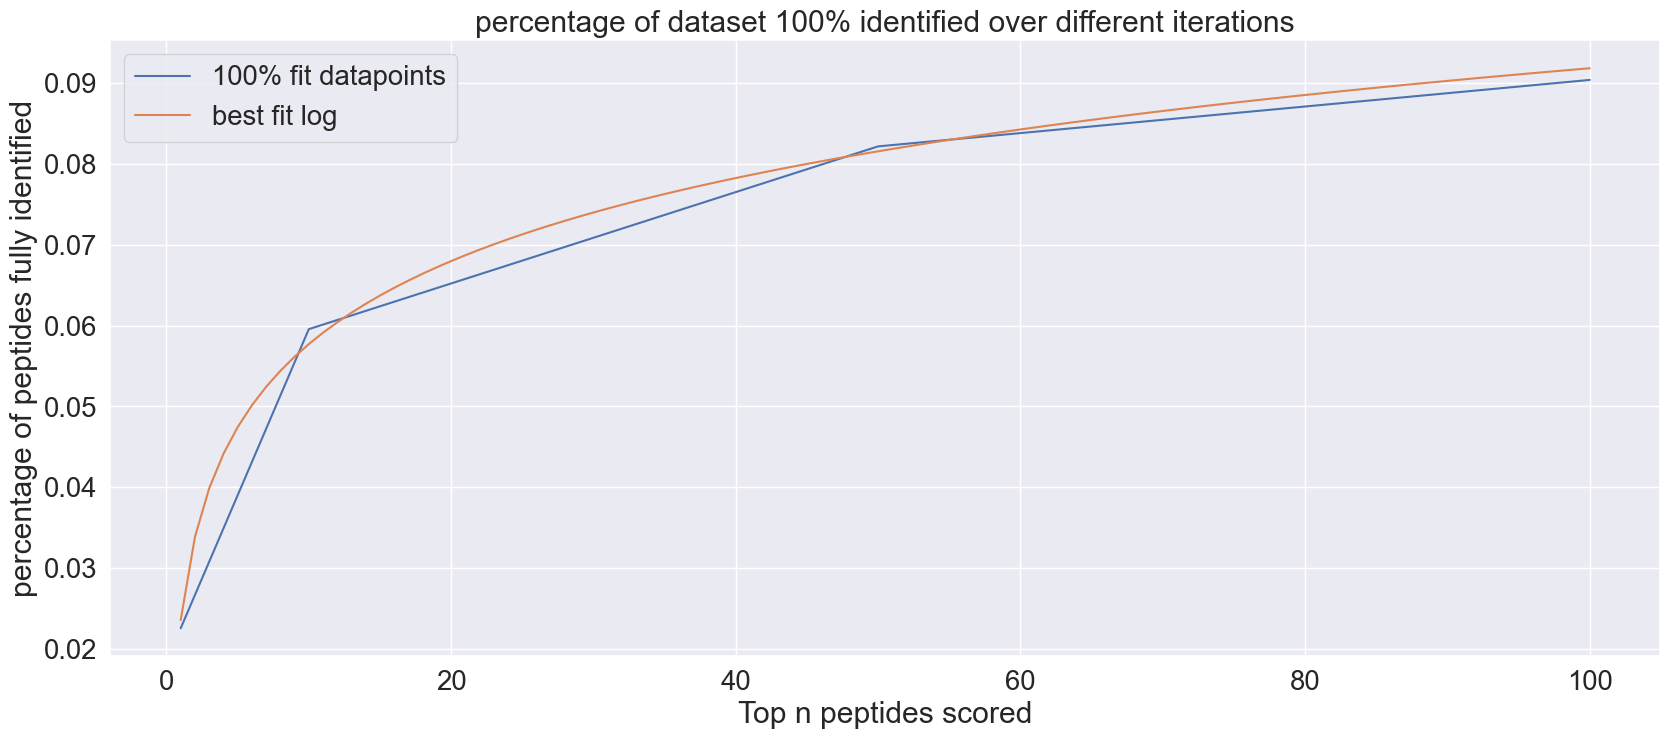

In [290]:
# for i in range(len(accuracy_list[0])):
plot_acc_over_t_for_100 = [lis[0] for lis in accuracy_list]
plot_acc_over_t_for_0 = [lis[-1] for lis in accuracy_list]
top_list =  [1, 10, 50, 100]
more_accurate_top_list = np.linspace(x[0], x[-1], 100)
plt.plot(top_list,plot_acc_over_t_for_100, label = "100% fit datapoints")
#plt.plot(top_list,plot_acc_over_t_for_0, label = "0%")
plt.plot(more_accurate_top_list, 0.01480655 * np.log(more_accurate_top_list) + 0.02360415,
         label = "best fit log")
plt.title("percentage of dataset 100% identified over different iterations")
plt.legend()
plt.xlabel("Top n peptides scored")
plt.ylabel("percentage of peptides fully identified")
plt.show()